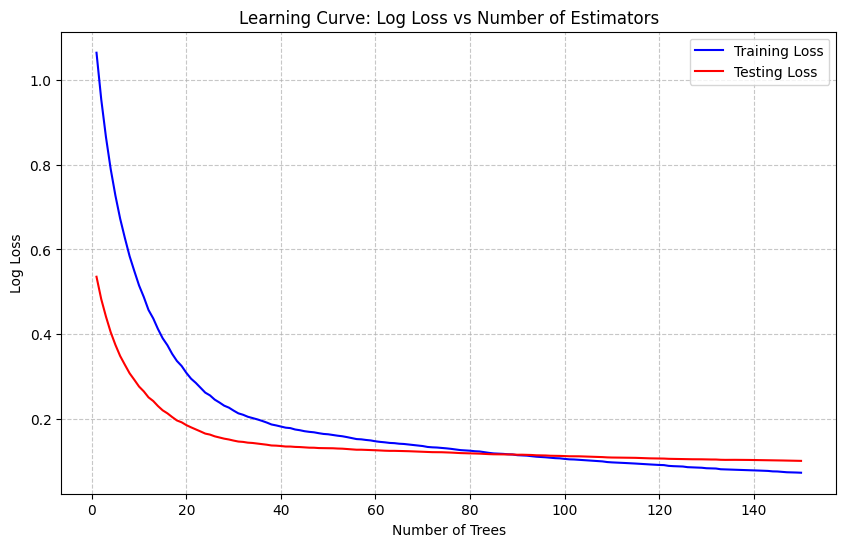

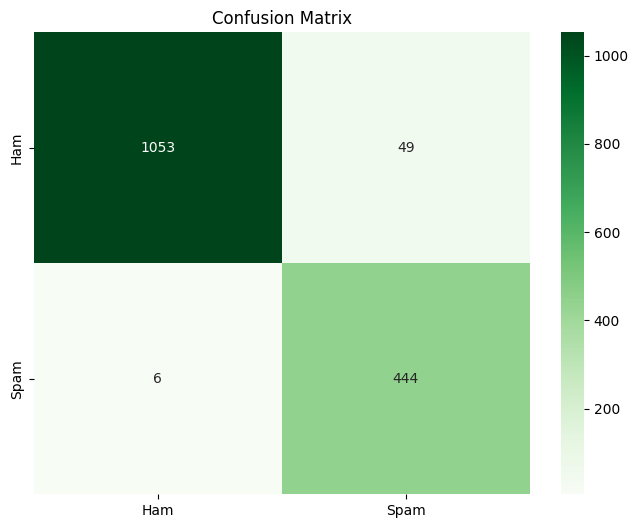

Model Accuracy: 0.9645618556701031

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1102
           1       0.90      0.99      0.94       450

    accuracy                           0.96      1552
   macro avg       0.95      0.97      0.96      1552
weighted avg       0.97      0.96      0.97      1552



In [23]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

# 1. Load Data
df = pd.read_csv('spam_ham_dataset.csv')

# 2. Professional Cleaning Function
def professional_clean(text):
    # Hapus prefix 'Subject: ', newline, jadikan lowercase, hapus tanda baca & angka
    text = re.sub(r'^Subject: ', '', text)
    text = text.replace('\r', ' ').replace('\n', ' ')
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text

# Terapkan pembersihan
df['text_cleaned'] = df['text'].apply(professional_clean)

# 3. Vectorization (TF-IDF)
tfidf = TfidfVectorizer(max_features=2500, stop_words='english')
X = tfidf.fit_transform(df['text_cleaned']).toarray()
y = df['label_num']

# 4. Train-Test Split (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5. Model Training (Gradient Boosting)
model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# 6. Metrics for Learning Curve (Loss vs Iterations)
train_loss = model.train_score_
test_loss = [log_loss(y_test, y_pred_staged) for y_pred_staged in model.staged_predict_proba(X_test)]

# --- VISUALISASI ---

# Grafik 1: Learning Curve (Learning Rate / Loss over Iterations)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_loss)) + 1, train_loss, label='Training Loss', color='blue')
plt.plot(np.arange(len(test_loss)) + 1, test_loss, label='Testing Loss', color='red')
plt.title('Learning Curve: Log Loss vs Number of Estimators')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Grafik 2: Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.show()

# --- REPORT ---
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))